In [1]:
from configobj import ConfigObj
import subprocess
import os, sys
import math
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Markdown
from astropy.table import Table, Column
from astropy.io import ascii
from astropy.coordinates import SkyCoord,Angle
from astropy.time import Time
from astroplan import Observer
from Atmospheric_diffraction import *
%matplotlib inline 
import math
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl
plt.style.use('bmh')
import Transmission_calculation as trans_calc

import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel, convolve
from astropy.modeling.functional_models import Disk2D
from astropy.modeling.models import Gaussian2D
from astropy.modeling.models import Moffat2D

import time

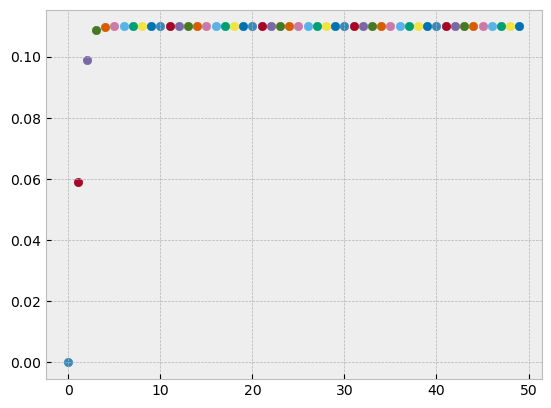

In [2]:
#Convergence of analytical solution with given terms in sum
scale=0.01 #1 pixel = scale arcsecs
FWHM=0.68 * u.arcsec
fibre_diameter=0.69 * u.arcsec
x_pos = 0.6 * u.arcsec / scale

for i in range(0,50):
    y=trans_calc.analytical_gaussian(fibre_diameter,FWHM,x_pos*scale,i)
    plt.scatter(i,y)

In [3]:
#Following compares numerical and analytical transmission calc methods for different numerical pixel to arcsec scales
def numerical_gaussian(fibre_diameter,FWHM,offset,scale):
    std = FWHM.value/(2*np.sqrt(2*np.log(2)))/scale
    x_pos=offset/scale

    gaussian_total= 2*np.pi*std**2 

    b2=math.ceil(fibre_diameter.value/2/scale)

    x = np.arange(-b2, b2+1)
    y = np.arange(-b2, b2+1)
    x, y = np.meshgrid(x, y)

    Disk=Disk2D(1,0,0,fibre_diameter.value/2/scale)
    Disk_data=Disk(x,y)
    Gaussian=Gaussian2D(1,x_pos.value,0,std,std)
    Gaussian_data=Gaussian(x,y)
    profile_data=Gaussian_data[int(len(Gaussian_data)/2)]

    convolved_data=Disk_data*Gaussian_data

    fig, ax = plt.subplots()
    ax.imshow(Disk_data)
    fig, ax = plt.subplots()
    ax.imshow(Gaussian_data)
    fig, ax = plt.subplots()
    ax.imshow(convolved_data)

    trans=sum(sum(convolved_data))/gaussian_total
    return trans, profile_data

def numerical_moffat(fibre_diameter,FWHM,offset,scale,beta=2.5):
    alpha=FWHM.value/scale/(2*np.sqrt(2**(1/beta)-1))

    moffat_total=(np.pi*alpha**2)/(beta-1)

    x_pos=offset/scale  

    b2=math.ceil(fibre_diameter.value/2/scale)

    x = np.arange(-b2, b2+1)
    y = np.arange(-b2, b2+1)
    x, y = np.meshgrid(x, y)

    Disk=Disk2D(1,0,0,fibre_diameter.value/2/scale)
    Disk_data=Disk(x,y)
    Moffat=Moffat2D(1,x_pos.value,0,alpha,beta)
    Moffat_data=Moffat(x,y)
    profile_data=Moffat_data[int(len(Moffat_data)/2)]

    convolved_data=Disk_data*Moffat_data

    # fig, ax = plt.subplots()
    # ax.imshow(Disk_data)
    # fig, ax = plt.subplots()
    # ax.imshow(Moffat_data)
    # fig, ax = plt.subplots()
    # ax.imshow(convolved_data)

    trans=sum(sum(convolved_data))/moffat_total
    return trans, profile_data


Analytical Transmission = 0.48960
Time Taken = 0.00663s
Scale = 0.1 pixel/arcsec, Numerical Transmission = 0.48693
99.45399407995065 percent of numerical
Time taken = 0.02218s
Scale = 0.01 pixel/arcsec, Numerical Transmission = 0.49013
100.10772175732185 percent of numerical
Time taken = 0.01955s
Scale = 0.001 pixel/arcsec, Numerical Transmission = 0.48953
99.98591357741387 percent of numerical
Time taken = 0.03658s
Scale = 0.0001 pixel/arcsec, Numerical Transmission = 0.48960
99.99961429711523 percent of numerical
Time taken = 2.82702s


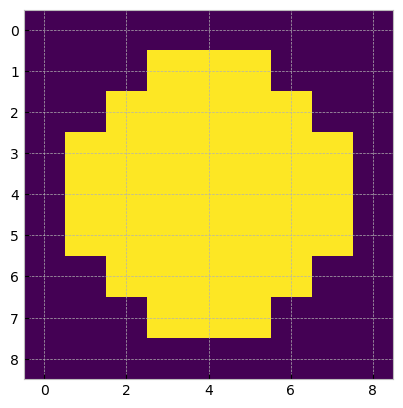

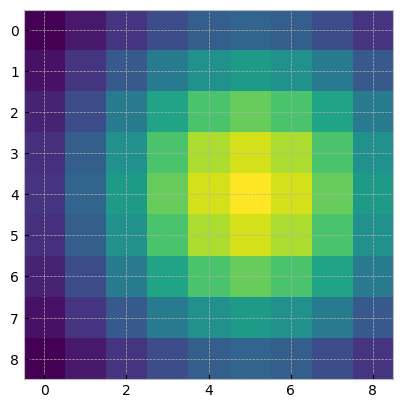

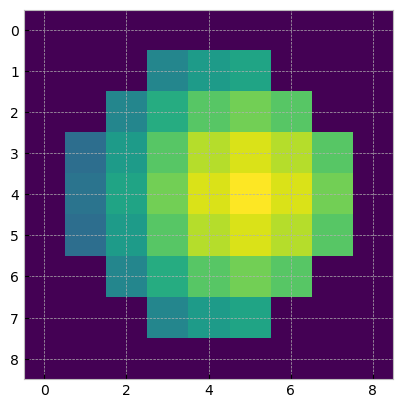

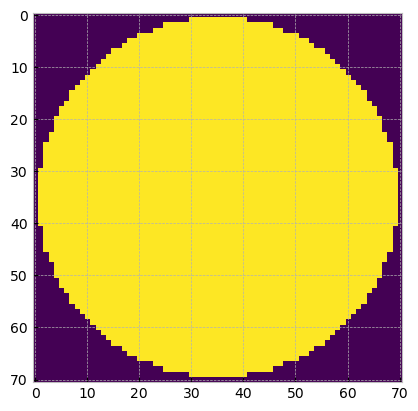

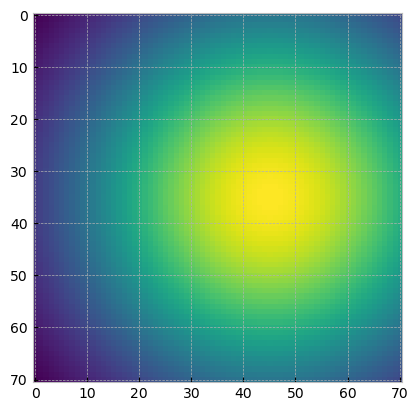

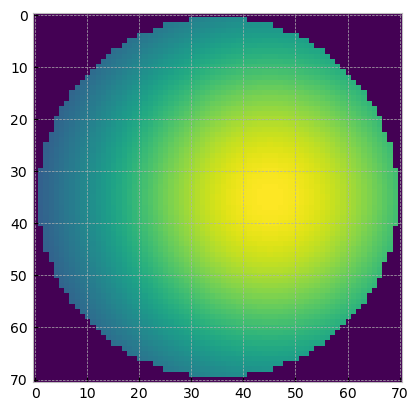

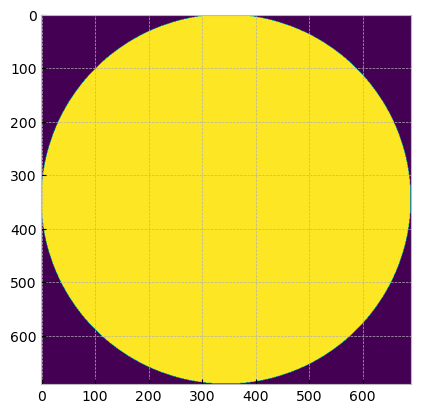

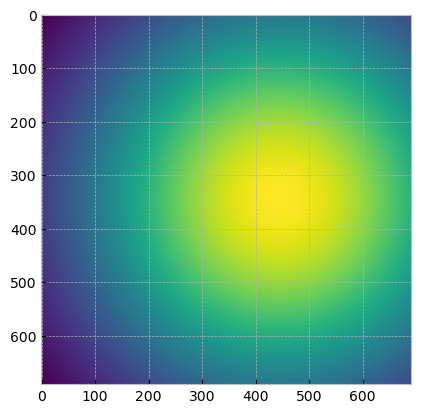

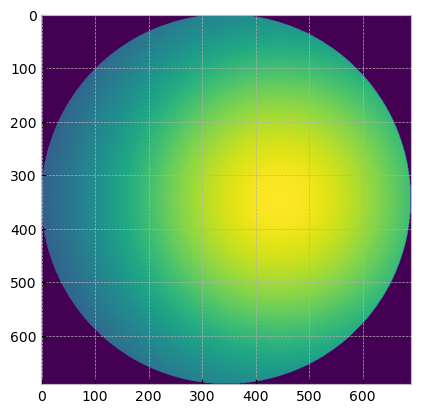

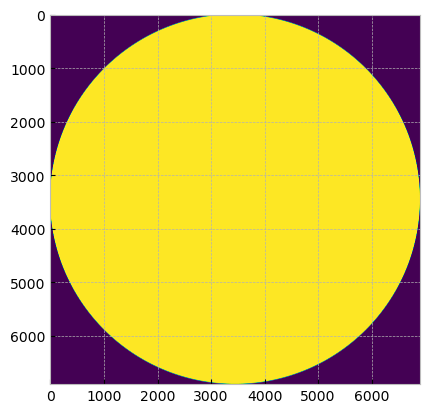

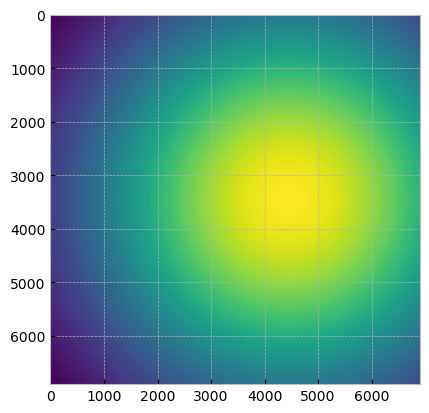

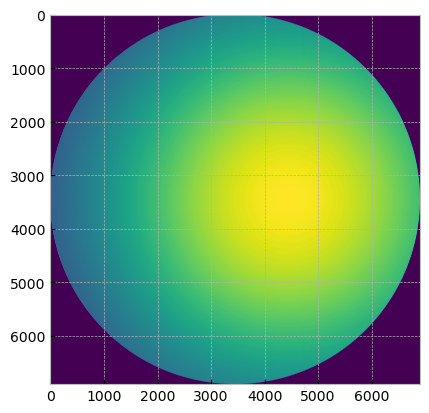

In [4]:
FWHM=0.68 * u.arcsec
fibre_diameter=0.69 * u.arcsec
offset=0.1*u.arcsec
scales=[0.1,0.01,0.001,0.0001]
t=time.time()
analval=trans_calc.analytical_gaussian(fibre_diameter,FWHM,offset,k_lim=60)
print("Analytical Transmission = %2.5f" %(analval))
print("Time Taken = %2.5fs" %(time.time()-t))
t=time.time()
for i in scales:
    print("===============================================================")

    val,g_profile = numerical_gaussian(fibre_diameter,FWHM,offset,i)
    print("Scale = %s pixel/arcsec, Numerical Transmission = %2.5f" %(i, val))
    print(str(100*val/analval)+" percent of numerical")
    t1=t
    t=time.time()
    print("Time taken = %2.5fs"%(t-t1))

In [5]:
scale=0.01
offset=0.1*u.arcsec
FWHM=0.68 * u.arcsec
fibre_diameter=0.69 * u.arcsec
scales=[0.1,0.01,0.001,0.0001]
t=time.time()
for i in scales:
    print("===============================================================")
    val,m_profile_2_5 = numerical_moffat(fibre_diameter,FWHM,offset,i)
    print("Scale = %s pixel/arcsec, Numerical Transmission = %2.5f" %(i, val))
    #print(str(100*val/analval)+" percent of numerical")
    t1=t
    t=time.time()
    print("Time taken = %2.5fs"%(t-t1))


Scale = 0.1 pixel/arcsec, Numerical Transmission = 0.33293
Time taken = 0.00136s
Scale = 0.01 pixel/arcsec, Numerical Transmission = 0.33525
Time taken = 0.00209s
Scale = 0.001 pixel/arcsec, Numerical Transmission = 0.33484
Time taken = 0.02300s
Scale = 0.0001 pixel/arcsec, Numerical Transmission = 0.33488
Time taken = 3.12337s


0.4901289289579336
0.41455603581338235
0.33525373849494594


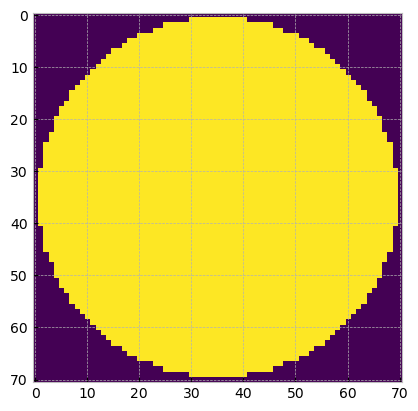

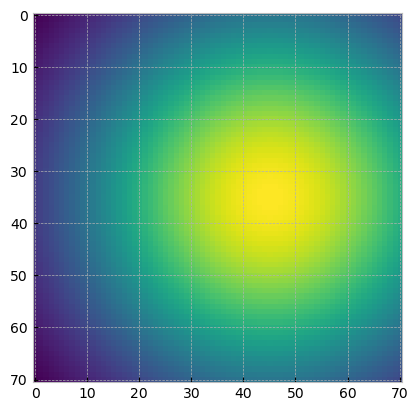

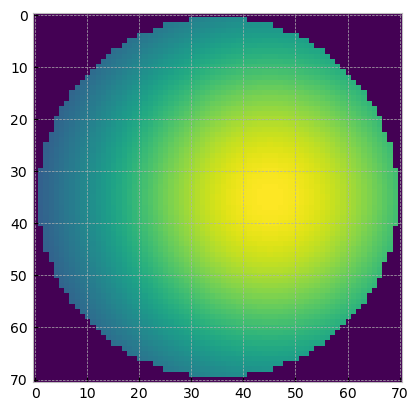

In [6]:
scale=0.01
offset=0.1*u.arcsec
FWHM=0.68 * u.arcsec
fibre_diameter=0.69 * u.arcsec

val,g_profile = numerical_gaussian(fibre_diameter,FWHM,offset,scale)
print(val)
val,m_profile_4_7 = numerical_moffat(fibre_diameter,FWHM,offset,scale,beta=4.765)
print(val)
val,m_profile_2_5 = numerical_moffat(fibre_diameter,FWHM,offset,scale,beta=2.5)
print(val)

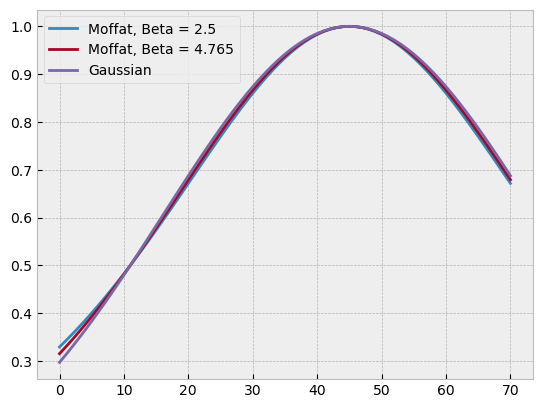

In [7]:
plt.plot(m_profile_2_5,label='Moffat, Beta = 2.5')
plt.plot(m_profile_4_7,label='Moffat, Beta = 4.765')
plt.plot(g_profile,label='Gaussian')
plt.legend()